In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:


# Assuming the file path is correctly specified or adjusted as per your upload location
file_path = 'C:/Users/z5345656/OneDrive - UNSW/Desktop/excel_sheets/Results_Share2.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the DataFrame to verify it loaded correctly
print(data.head())


     policy  RoW_REEs_Marketshare Grouped_Policy     State
0  Baseline              0.399535       Baseline  Baseline
1  Baseline              0.159617       Baseline  Baseline
2  Baseline              0.148748       Baseline  Baseline
3  Baseline              0.402406       Baseline  Baseline
4  Baseline              0.349460       Baseline  Baseline


C:\Users\z5345656\AppData\Local\Temp\ipykernel_22576\1651136760.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  lineplot = sns.lineplot(data=data, x='State', y='RoW_REEs_Marketshare', hue='Grouped_Policy',


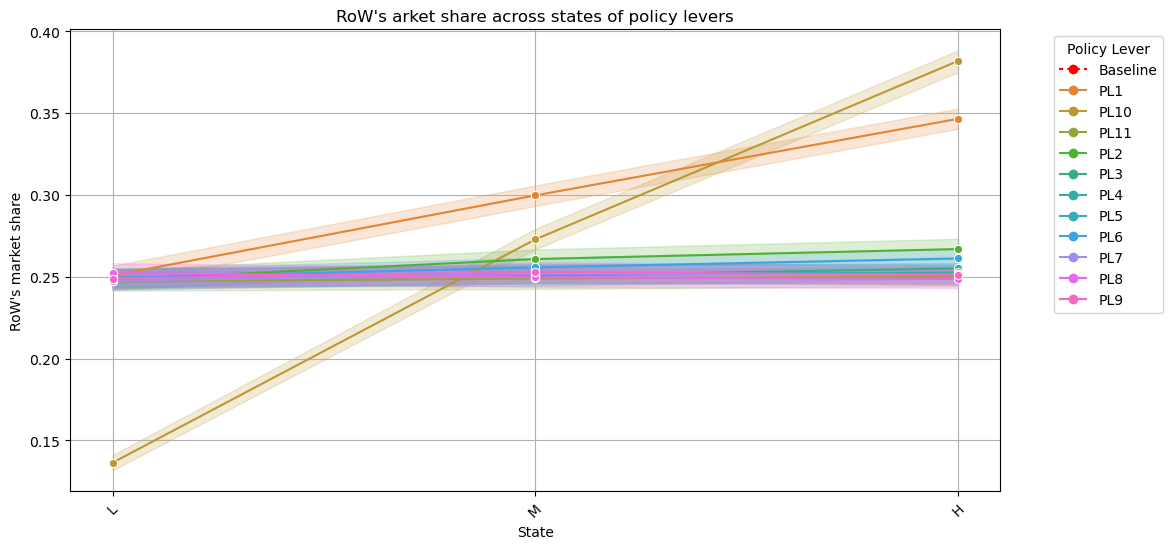

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'State' is treated as a categorical variable with a specific order
data['State'] = pd.Categorical(data['State'], categories=['L', 'M', 'H'], ordered=True)

# Sorting the data to ensure it plots correctly
data = data.sort_values(by=['Grouped_Policy', 'State'])

# Define a palette that assigns 'red' to 'Baseline' and uses a default color cycle for others
palette = sns.color_palette("husl", n_colors=len(data['Grouped_Policy'].unique()))
palette_dict = {policy: 'red' if policy == 'Baseline' else palette[i] for i, policy in enumerate(data['Grouped_Policy'].unique())}

# Dashes set only for 'Baseline', solid lines for others
styles = {policy: (2, 2) if policy == 'Baseline' else (1, 0) for policy in data['Grouped_Policy'].unique()}

# Create the line graph with custom styling, ensuring uniform markers
plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(data=data, x='State', y='RoW_REEs_Marketshare', hue='Grouped_Policy', 
                        style='Grouped_Policy', dashes=styles, palette=palette_dict, ci= 95)

# Set the same marker for all lines after plotting
for line in lineplot.lines:
    plt.setp(line, marker='o')  # Apply circle markers to each line

plt.title("RoW's arket share across states of policy levers")
plt.xlabel('State')
plt.ylabel("RoW's market share")
plt.legend(title='Policy Lever', bbox_to_anchor=(1.05, 1), loc=2)
#plt.legend(title='Policy Lever', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)




# Save as PDF
#plt.savefig('C:/Users/z5345656/OneDrive - UNSW/Desktop/excel_sheets/ResultsForThePaper/RDM_Share.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('C:/Users/z5345656/OneDrive - UNSW/Desktop/excel_sheets/ResultsForThePaper/RDM_Share.pdf', format='pdf')



# Saving the plot as a PDF file
plt.savefig('RDM_Share.pdf', format='pdf', bbox_inches='tight')


plt.show()


In [ ]:
# Compute summary statistics for a specific column, say 'RoW_REEs_Marketshare', grouped by 'Grouped_Policy'
grouped_data = data.groupby('Grouped_Policy')['RoW_REEs_Marketshare'].describe()

# Optional: Adding additional statistical tests or custom statistics
# For example, perform an ANOVA test across groups
from scipy.stats import f_oneway
anova_result = f_oneway(*(data[data['Grouped_Policy'] == group]['RoW_REEs_Marketshare'] for group in data['Grouped_Policy'].unique()))

# Display the summary table
print("Summary Statistics:")
print(grouped_data)

# Display ANOVA results
print("\nANOVA Test Results:")
print(f"F-Statistic: {anova_result.statistic}, P-Value: {anova_result.pvalue}")